In [24]:
import random as rand
import timeit as t

import matplotlib.pyplot as plt
import numpy as np

In [25]:
"Bubble sort"
def bubbleSort(a):
    n = len(a)
    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j + 1]:
                a[j], a[j+1] = a[j+1], a[j]
                

In [26]:
"Insertion Sort"
def insertionSort(a):
    for i in range(len(a)):
        minIndex = i
        for j in range(i+1, len(a)):
            if a[minIndex] > a[j]:
                minIndex = j
        a[i], a[minIndex] = a[minIndex], a[i]

In [27]:
"MergeSort"
def merge(left, right):
    if len(left) == 0: return right
    if len(right) == 0: return left
    
    n = len(left) + len(right)
    resp = np.empty(n)
    i = 0
    j = 0
    while(i + j < n):
        if(i < len(left) and (j >= len(right) or left[i] <= right[j])):
            resp[i+j] = left[i]
            i += 1
        else:
            resp[i+j] = right[j]
            j += 1
    return resp        

def mergeSort(arr):
    if(len(arr) > 1):
        corte = int(len(arr)/2)
        left = mergeSort(arr[:corte])
        right = mergeSort(arr[corte:])
        resp = merge(left, right)
    else:
        resp = arr
    return resp

In [28]:
def isSortedAsc(a):
    return all(a[i] <= a[i+1] for i in range(len(a) - 1))

def isSortedDesc(a):
    return all(a[i] >= a[i+1] for i in range(len(a) - 1))

In [29]:
def createDoubleArray(size):
    arr = []
    for i in range(size):
        arr.append(rand.random())
    return np.array(arr, dtype = float)

def createIntArray(size):
    arr = []
    num = size*2
    for i in range(size):
        arr.append(rand.randint(0,num))
    return np.array(arr, dtype = int)


In [30]:
def getPruebas(px):
    pruebas = []
    
    arregloPruebasInt = []
    arregloPruebasDouble = []
    
    
    for i in px:
        arregloPruebasInt.append(createIntArray(i))
        arregloPruebasDouble.append(createDoubleArray(i))
    
    pruebas.append(arregloPruebasInt)
    pruebas.append(arregloPruebasDouble)
    
    return pruebas    

In [31]:
def time(funk, this):
    return t.timeit(funk, number=this)

In [44]:
"Pruebas Bubble"
def getResultadosBubble(px):
    pruebas = getPruebas(px)
    resultados=[]
    for prueba in pruebas:
        res = []
        for i in prueba:
            def bubbleSortTest():
                bubbleSort(i)
            res.append(time(bubbleSortTest,5))
        resultados.append(res)
    return {'resultadosInt':resultados[0], 'resultadosDouble':resultados[1], 'arreglosPrueba':pruebas}

"Pruebas Insertion"
def getResultadosInsertion(px):
    pruebas = getPruebas(px)
    resultados=[]
    for prueba in pruebas:
        res = []
        for i in prueba:
            def insertionSortTest():
                insertionSort(i)
            res.append(time(insertionSortTest,5))
        resultados.append(res)
    return {'resultadosInt':resultados[0], 'resultadosDouble':resultados[1], 'arreglosPrueba':pruebas}

"Pruebas MergeSort"
def getResultadosMerge(px):
    pruebas = getPruebas(px)
    resultados = []
    arreglosOrdenados = []
    for prueba in pruebas:
        res = []
        for i in prueba:
            def mergeSortTest():
                arreglosOrdenados.append(mergeSort(i))
            res.append(time(mergeSortTest,5))
        resultados.append(res)
    return {'resultadosInt':resultados[0], 'resultadosDouble':resultados[1], 'arreglosPrueba':arreglosOrdenados}

In [69]:
px = np.linspace(100, 5000, num = 5, dtype = int)

In [45]:
bubbleTestResults = getResultadosBubble(px)
insertionTestResults = getResultadosInsertion(px)
mergeTestResults = getResultadosMerge(px)

In [56]:
print ('Bubble sort enteros: ' + str(all(isSortedAsc(i) for i in bubbleTestResults['arreglosPrueba'][0])))
print ('Bubble sort reales: ' + str(all(isSortedAsc(i) for i in bubbleTestResults['arreglosPrueba'][1])))
print ('Incercion sort enteros: ' + str(all(isSortedAsc(i) for i in insertionTestResults['arreglosPrueba'][0])))
print ('Incercion sort reales: ' + str(all(isSortedAsc(i) for i in insertionTestResults['arreglosPrueba'][1])))
print('Mezcla sort: ' + str(all(isSortedAsc(i) for i in mergeTestResults['arreglosPrueba'])))

Bubble sort enteros: True
Bubble sort reales: True
Incercion sort enteros: True
Incercion sort reales: True
Mezcla sort: True


Text(0.5,0,'Tamaño del arreglo')

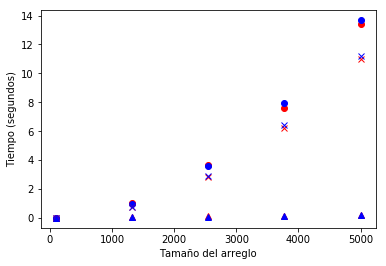

In [55]:
plt.plot(px, bubbleTestResults['resultadosInt'], 'ro')
plt.plot(px, bubbleTestResults['resultadosDouble'], 'bo')
plt.plot(px, insertionTestResults['resultadosInt'], 'rx')
plt.plot(px, insertionTestResults['resultadosDouble'], 'bx')
plt.plot(px, mergeTestResults['resultadosInt'], 'r^')
plt.plot(px, mergeTestResults['resultadosDouble'] , 'b^')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Tamaño del arreglo')

In [70]:
print(px)
print(bubbleTestResults['resultadosInt'])
print(bubbleTestResults['resultadosDouble'])
print(insertionTestResults['resultadosInt'])
print(insertionTestResults['resultadosDouble'])

[ 100 1325 2550 3775 5000]
[0.005675312821040279, 1.015825817203222, 3.660302805255924, 7.6279351401990425, 13.421293250159579]
[0.006052255481336033, 0.9585497812931862, 3.5607469559872698, 7.9515437806858245, 13.674612190166954]
[0.004430920846061781, 0.7645930543094437, 2.8546005450425582, 6.229974159377889, 11.00275504982892]
[0.00492688114354678, 0.7870078291798563, 2.9140734348475235, 6.407864467459149, 11.17484781942585]


In [62]:
px = np.linspace(10000, 1000000, num = 10, dtype = int)

Text(0.5,0,'Tamaño del arreglo')

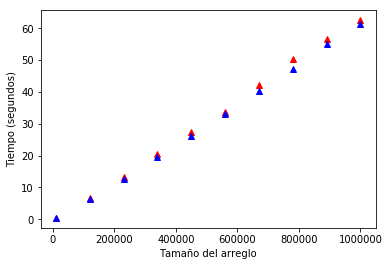

In [63]:
mergeTestResults = getResultadosMerge(px)
plt.plot(px, mergeTestResults['resultadosInt'], 'r^')
plt.plot(px, mergeTestResults['resultadosDouble'] , 'b^')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Tamaño del arreglo')

In [68]:
print(px)
print(mergeTestResults['resultadosInt'])
print(mergeTestResults['resultadosDouble'])

[  10000  120000  230000  340000  450000  560000  670000  780000  890000
 1000000]
[0.45937729072829825, 6.59591233757601, 13.28563623910668, 20.471078874048544, 27.2587469142818, 33.80154979573126, 42.08006743263468, 50.40293566150285, 56.76004600304441, 62.503283571557404]
[0.4246247816554387, 6.299888842015207, 12.750368361197616, 19.431428356030665, 26.175193002662127, 33.136699618407874, 40.4097681080857, 47.126700853496004, 54.98794617579915, 61.30772155005252]


In [52]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [53]:
%%cython
"Bubble sort"
def bubbleSort(list a):
    cdef int n = len(a)
    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j + 1]:
                a[j], a[j+1] = a[j+1], a[j]
                
"Insertion Sort"
def insertionSort(list a):
    for i in range(len(a)):
        cdef int minIndex = i
        for j in range(i+1, len(a)):
            if a[minIndex] > a[j]:
                minIndex = j
        a[i], a[minIndex] = a[minIndex], a[i]


Error compiling Cython file:
------------------------------------------------------------
...
                a[j], a[j+1] = a[j+1], a[j]
                
"Insertion Sort"
def insertionSort(list a):
    for i in range(len(a)):
        cdef int minIndex = i
            ^
------------------------------------------------------------

C:\Users\Merlin The Sorcerer\.ipython\cython\_cython_magic_b08f9d704cf0ec1e665db4197fcd4c67.pyx:12:13: cdef statement not allowed here


TypeError: object of type 'NoneType' has no len()